In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os


In [38]:
DATA_ROOT = "/content/drive/MyDrive/VisionAI"
IMAGES_DIR = os.path.join(DATA_ROOT, "val2017")  # or train2017
ANN_FILE = os.path.join(DATA_ROOT, "annotations", "instances_val2017.json")


In [39]:
coco = COCO(ANN_FILE)
img_ids = coco.getImgIds()
print("Total images in dataset:", len(img_ids))


loading annotations into memory...
Done (t=0.76s)
creating index...
index created!
Total images in dataset: 5000


In [40]:
def build_binary_mask(coco, img_info):
    # Get all annotations for this image
    ann_ids = coco.getAnnIds(imgIds=img_info['id'], iscrowd=False)
    anns = coco.loadAnns(ann_ids)

    # Empty mask
    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)

    # Add each object’s mask
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))

    # Convert to binary: 0 = background, 1 = subject
    mask = np.clip(mask, 0, 1)
    return mask


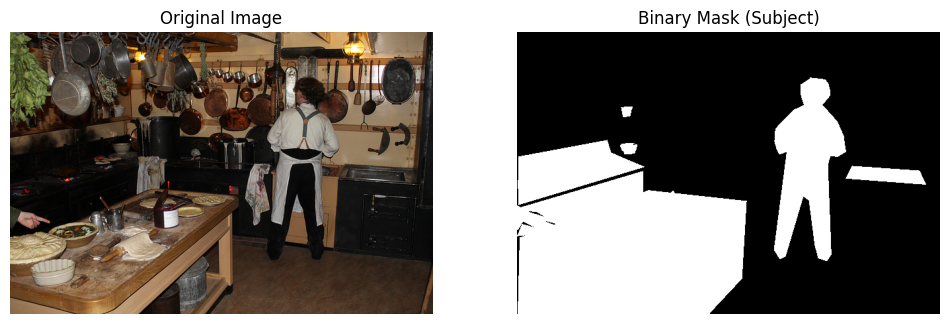

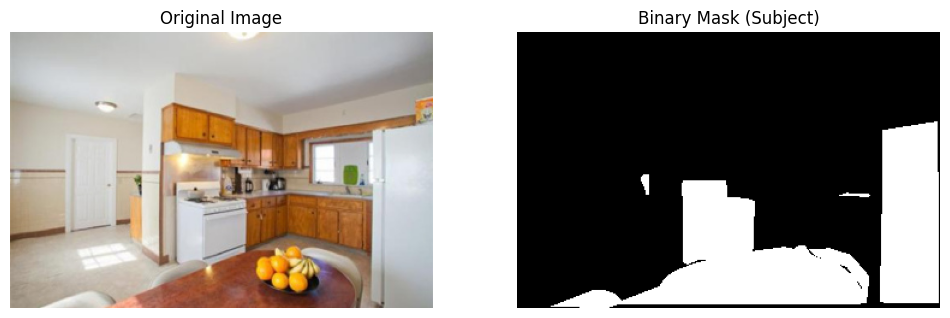

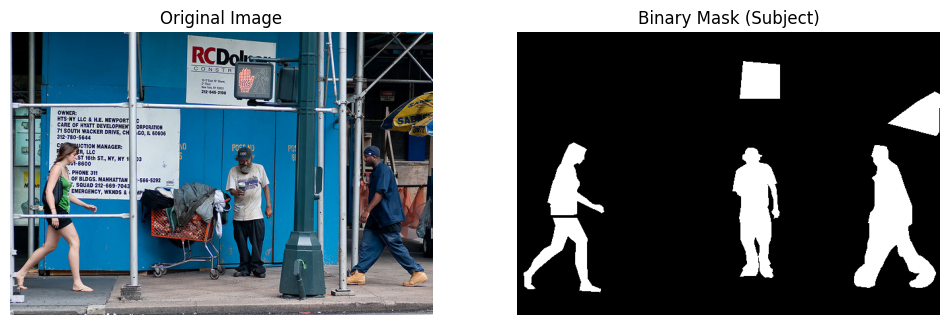

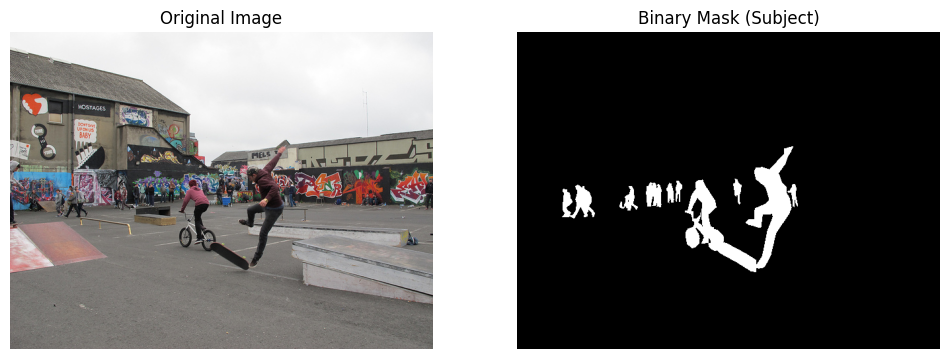

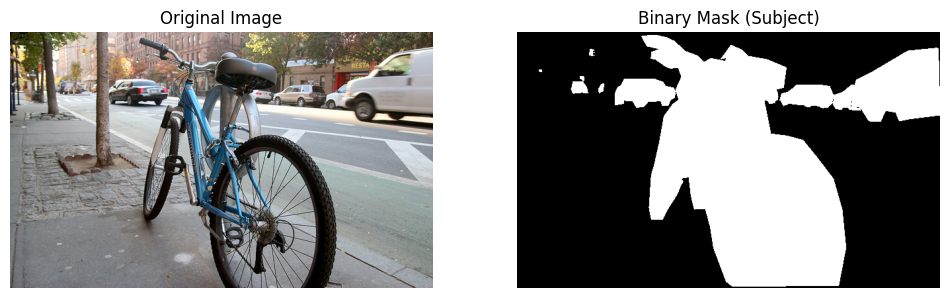

In [41]:
for img_id in img_ids[:5]:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(IMAGES_DIR, img_info['file_name'])

    img = cv2.imread(img_path)
    if img is None:
        print("Image missing:", img_path)
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = build_binary_mask(coco, img_info)

    plt.figure(figsize=(12,6))

    # Original image
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    # Binary mask
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap="gray")
    plt.title("Binary Mask (Subject)")
    plt.axis("off")

    plt.show()
